In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data**

In [2]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df = df.drop(['PID','MS SubClass','Lot Frontage','Lot Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','2nd Flr SF','Low Qual Fin SF','Bsmt Full Bath','Bsmt Half Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','Enclosed Porch','Open Porch SF','3Ssn Porch','Screen Porch','Pool Area','Misc Val','Mo Sold','Yr Sold','Wood Deck SF','Overall Cond'],axis=1)

In [5]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


In [6]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

**Removing Outliers**

Feature : Masonry veneer area in square feet

In [146]:
df[(df['Mas Vnr Area']>1500) & (df['SalePrice']<300000)].index

Int64Index([1849], dtype='int64')

In [147]:
df[(df['Mas Vnr Area']<10) & (df['SalePrice']>700000)].index

Int64Index([1760], dtype='int64')

In [148]:
df[(df['Mas Vnr Area']>1100) & (df['SalePrice']>550000)].index

Int64Index([1767, 2445], dtype='int64')

In [149]:
df[(df['Mas Vnr Area']>1000) & (df['SalePrice']>550000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
1767,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,832.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,755000
2445,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,807.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,625000


In [150]:
df[(df['Mas Vnr Area']>1400) & (df['SalePrice']<300000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
1849,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,576.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,239000


<AxesSubplot:xlabel='Mas Vnr Area'>

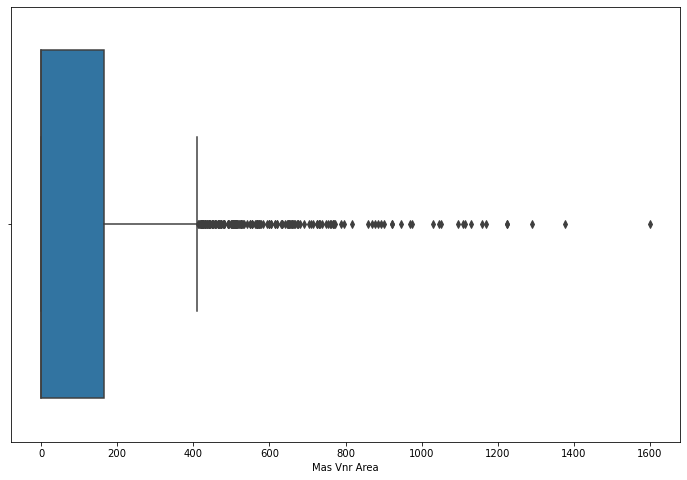

In [151]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Mas Vnr Area',whis=1.5,data=df)

<Figure size 864x576 with 0 Axes>

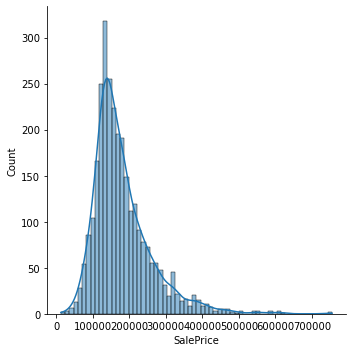

In [152]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='SalePrice',kde=True)

<Figure size 864x576 with 0 Axes>

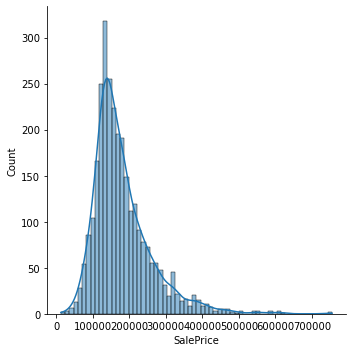

In [153]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='SalePrice',kde=True)

In [154]:
df[(df['SalePrice']>700000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
1760,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,813.0,TA,TA,Y,Ex,MnPrv,NaN,WD,Abnorml,745000
1767,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,832.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,755000


In [155]:
df['SalePrice'] = np.log10(df['SalePrice'])

<Figure size 864x576 with 0 Axes>

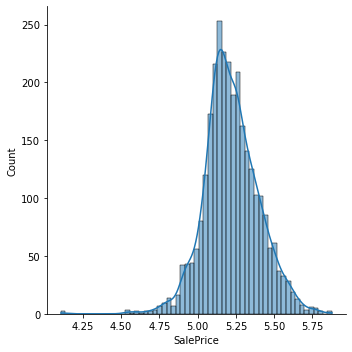

In [156]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='SalePrice',kde=True)

<AxesSubplot:xlabel='SalePrice'>

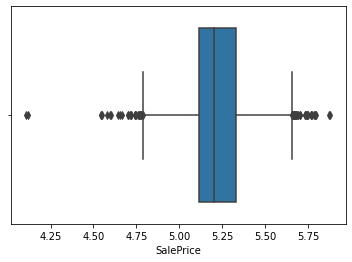

In [157]:
sns.boxplot(x='SalePrice',whis=1.5,data=df)

In [158]:
df[(df['SalePrice']<4.65)].index

Int64Index([181, 709, 726, 727, 1553, 1555, 1901, 2843, 2880], dtype='int64')

In [159]:
df.drop([181, 709, 726, 727, 1553, 1555, 1901, 2843, 2880],axis=0,inplace=True)

<AxesSubplot:xlabel='SalePrice'>

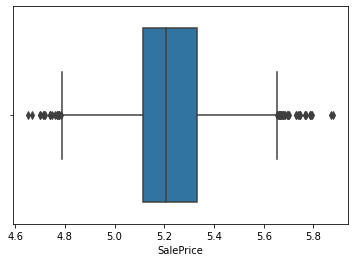

In [160]:
sns.boxplot(x='SalePrice',whis=1.5,data=df)

In [161]:
df[(df['SalePrice']>5.8)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
1760,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,813.0,TA,TA,Y,Ex,MnPrv,NaN,WD,Abnorml,5.872156
1767,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,832.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.877947


In [162]:
df.drop([1760, 1767],axis=0,inplace=True)

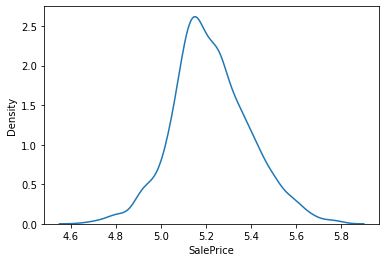

In [163]:
sns.kdeplot(x='SalePrice',data=df);

Feature : Total Basement in square feet

In [164]:
df[(df['Total Bsmt SF']>3000) & (df['SalePrice']<300000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
423,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,672.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.744293
444,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,880.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.453318
1498,RL,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,...,1418.0,TA,TA,Y,Gd,NaN,NaN,New,Partial,5.204120
1772,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,...,546.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.633468
2180,RL,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,...,1154.0,TA,TA,Y,NaN,NaN,Elev,New,Partial,5.264464
2181,RL,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,...,884.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.266584


In [165]:
df[(df['Total Bsmt SF']>3000) & (df['SalePrice']<300000)].index

Int64Index([423, 444, 1498, 1772, 2180, 2181], dtype='int64')

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

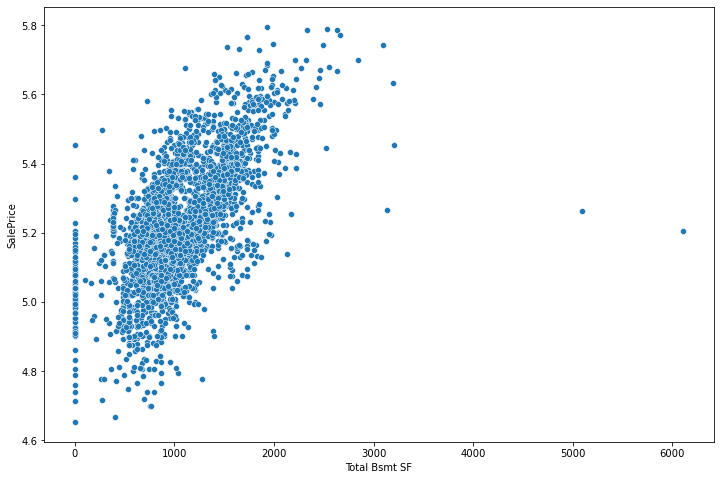

In [166]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=df)

In [167]:
df[(df['Total Bsmt SF']==0) & (df['SalePrice']>180000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice


In [168]:
df.drop([444,1498,2180,2181],axis=0,inplace=True)

In [169]:
df.drop([887,1497,2892],axis=0,inplace=True)

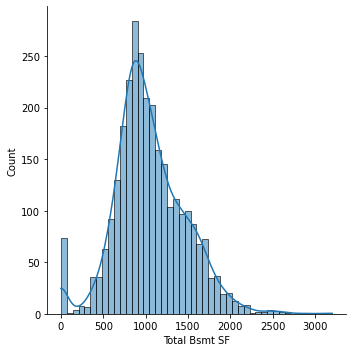

In [170]:
sns.displot(data=df,x='Total Bsmt SF',kde=True)

<AxesSubplot:xlabel='Total Bsmt SF'>

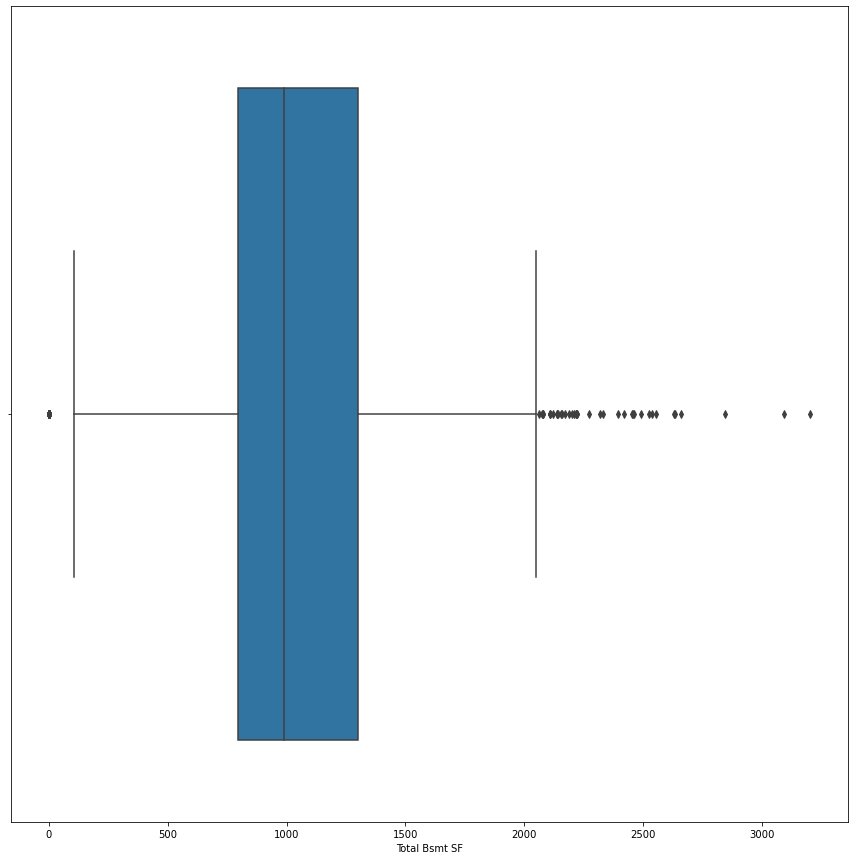

In [171]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Total Bsmt SF',whis=1.5)

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

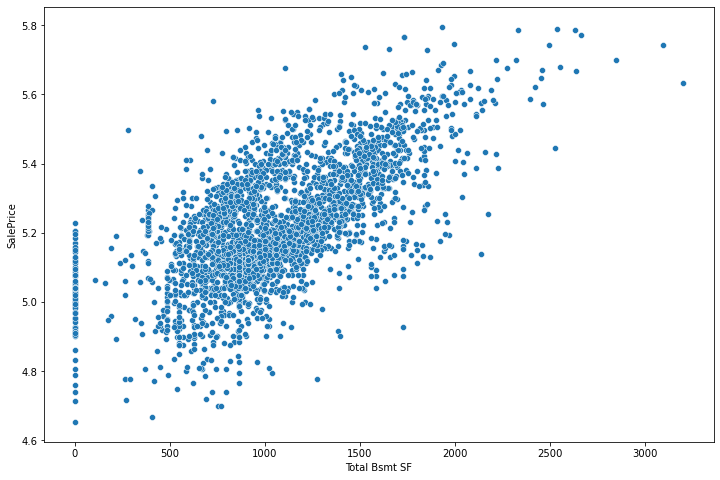

In [172]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=df)

In [173]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : First Floor square feet

In [174]:
df[(df['1st Flr SF']>3000) & (df['SalePrice']>400000)].index

Int64Index([], dtype='int64')

In [175]:
df.drop([1772],axis=0,inplace=True)

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

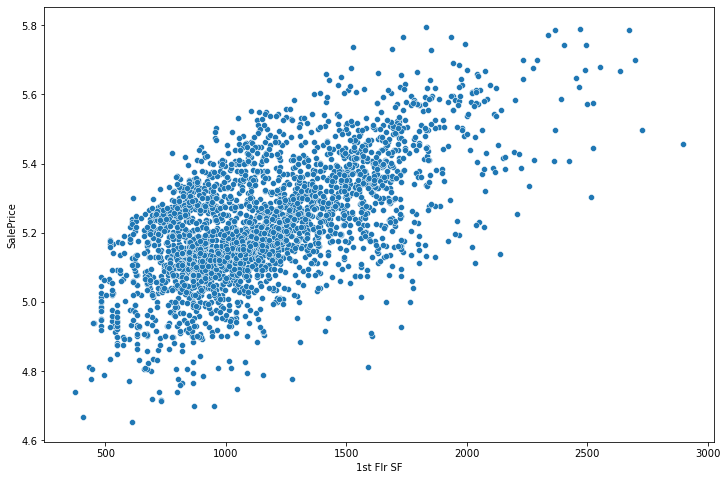

In [176]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st Flr SF',y='SalePrice',data=df)

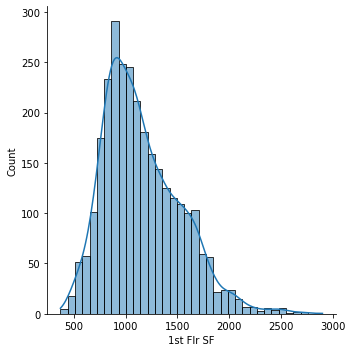

In [177]:
sns.displot(data=df,x='1st Flr SF',kde=True)

<AxesSubplot:xlabel='1st Flr SF'>

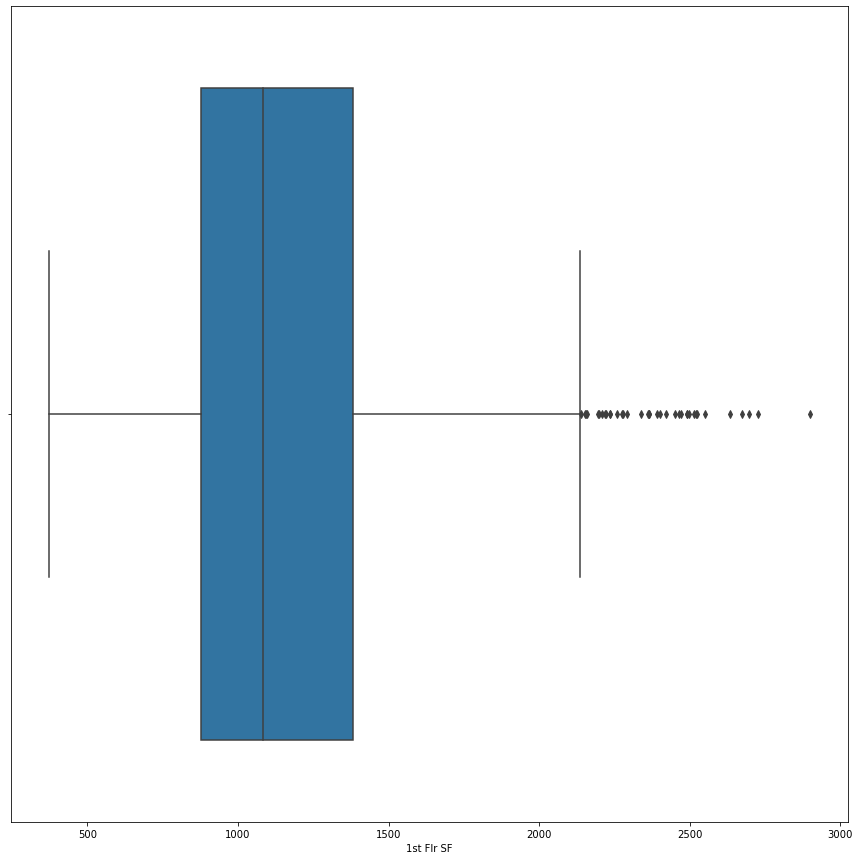

In [178]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='1st Flr SF',whis=1.5)

In [179]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Year garage was built

In [180]:
df[(df['Garage Yr Blt']>2200) & (df['SalePrice']<300000)].index

Int64Index([2260], dtype='int64')

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

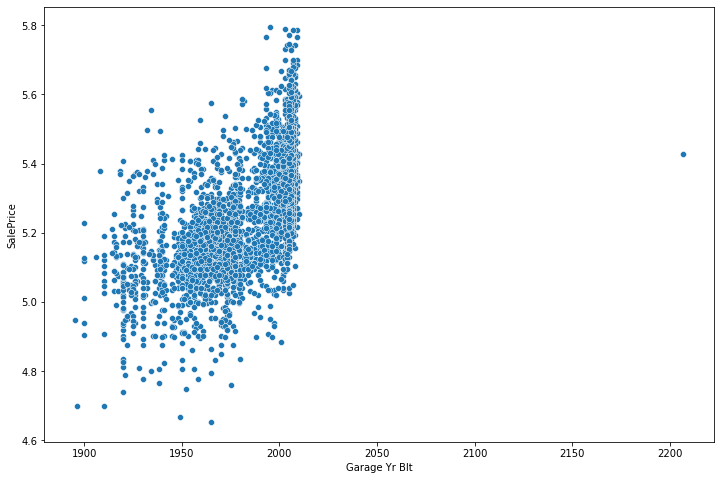

In [181]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt',y='SalePrice',data=df)

In [182]:
df.drop([2260],axis=0,inplace=True)

In [183]:
df[(df['Garage Yr Blt']<1900)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
307,C (all),Grvl,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,...,330.0,TA,TA,N,NaN,NaN,NaN,WD,Alloca,4.700167
1554,C (all),Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,...,185.0,Fa,TA,Y,NaN,NaN,NaN,WD,Normal,4.949390


In [184]:
df.drop([307,1554],axis=0,inplace=True)

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

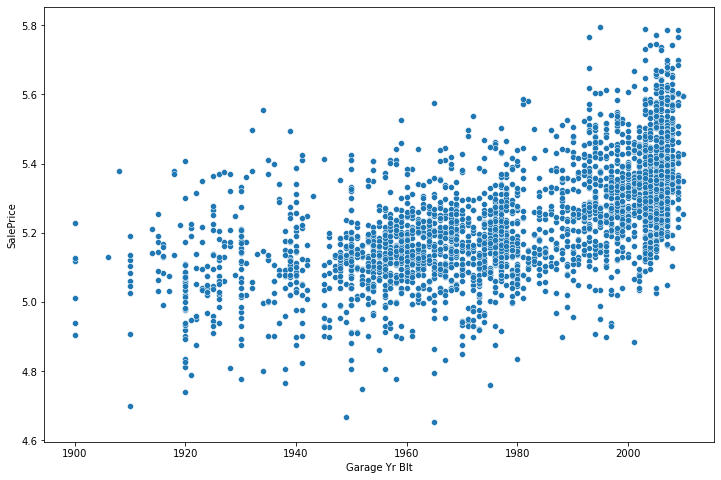

In [185]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt',y='SalePrice',data=df)

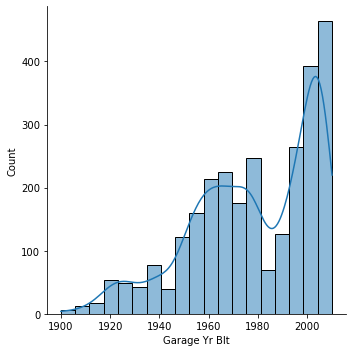

In [186]:
sns.displot(data=df,x='Garage Yr Blt',kde=True)

<AxesSubplot:xlabel='Garage Yr Blt'>

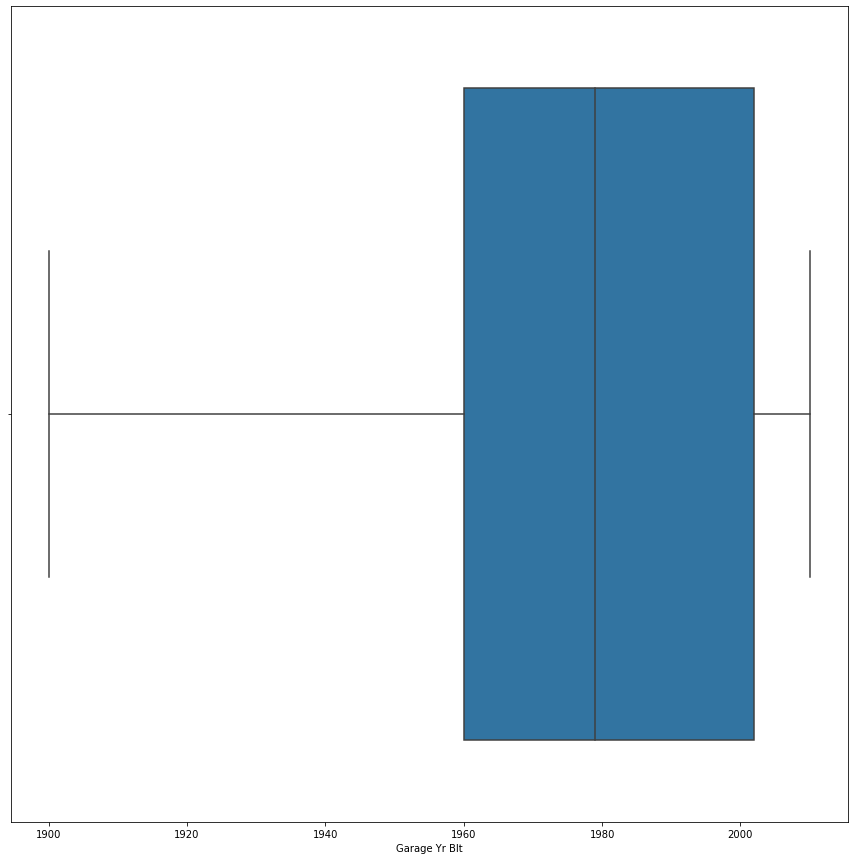

In [187]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Garage Yr Blt',whis=1.5)

In [188]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Above grade (ground) living area square feet

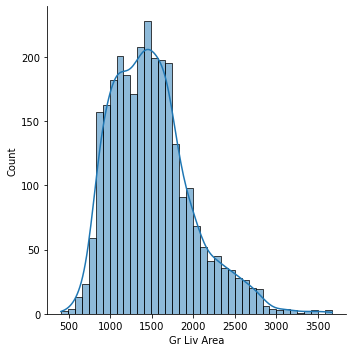

In [189]:
sns.displot(data=df,x='Gr Liv Area',kde=True)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

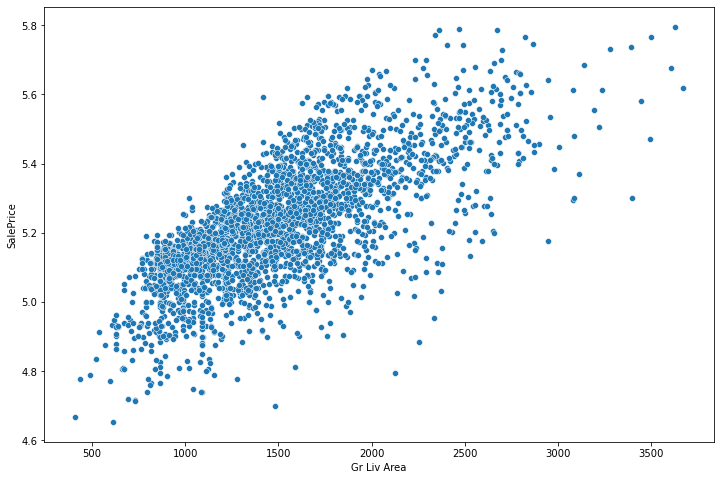

In [190]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Gr Liv Area'>

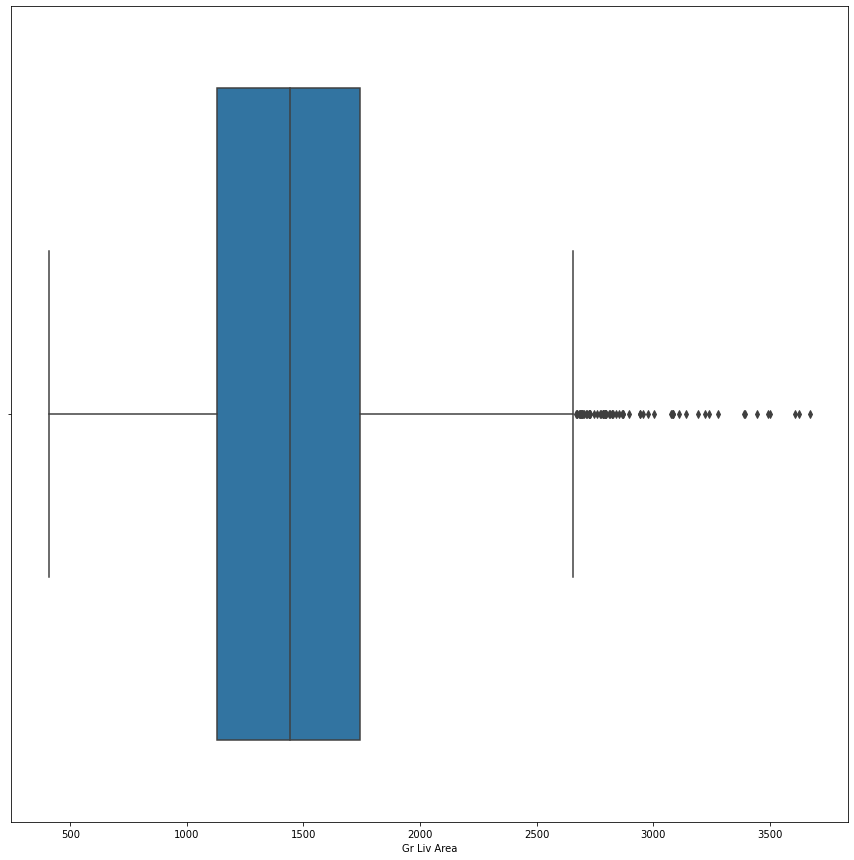

In [191]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Gr Liv Area',whis=1.5)

In [192]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Remodel date (same as construction date if no remodeling or additions)

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

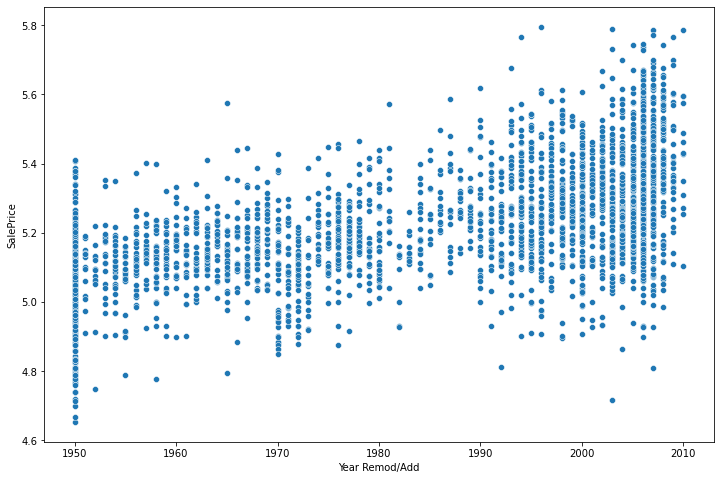

In [193]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add',y='SalePrice',data=df)

In [194]:
df[(df['Year Remod/Add']<1975) & (df['SalePrice']<20000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
18,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,...,400.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.149219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0.0,NaN,NaN,Y,NaN,NaN,NaN,WD,Abnorml,4.963788
2917,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,286.0,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,4.942256
2918,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0.0,NaN,NaN,Y,NaN,GdPrv,NaN,WD,Normal,4.900367
2919,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0.0,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal,4.956649


In [195]:
df[(df['Year Remod/Add']<1970) & (df['SalePrice']>300000)].index

Int64Index([], dtype='int64')

In [196]:
df[(df['Year Remod/Add']<1985) & (df['SalePrice']>300000)].index

Int64Index([], dtype='int64')

In [199]:
df.drop([956,1860],axis=0,inplace=True)

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

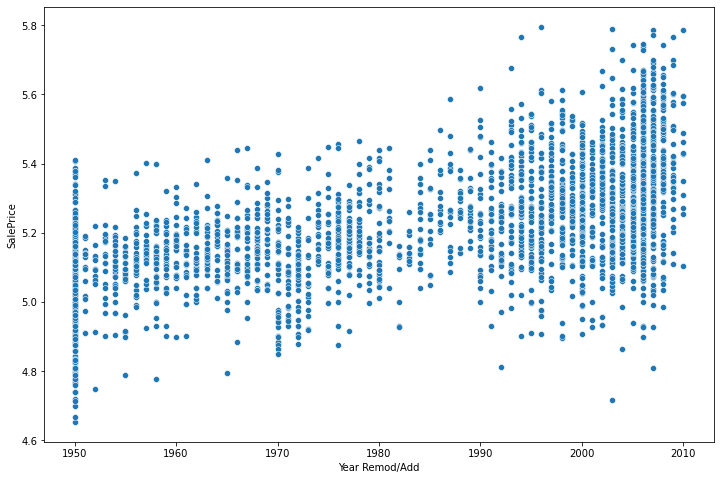

In [200]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add',y='SalePrice',data=df)

<AxesSubplot:xlabel='Year Remod/Add'>

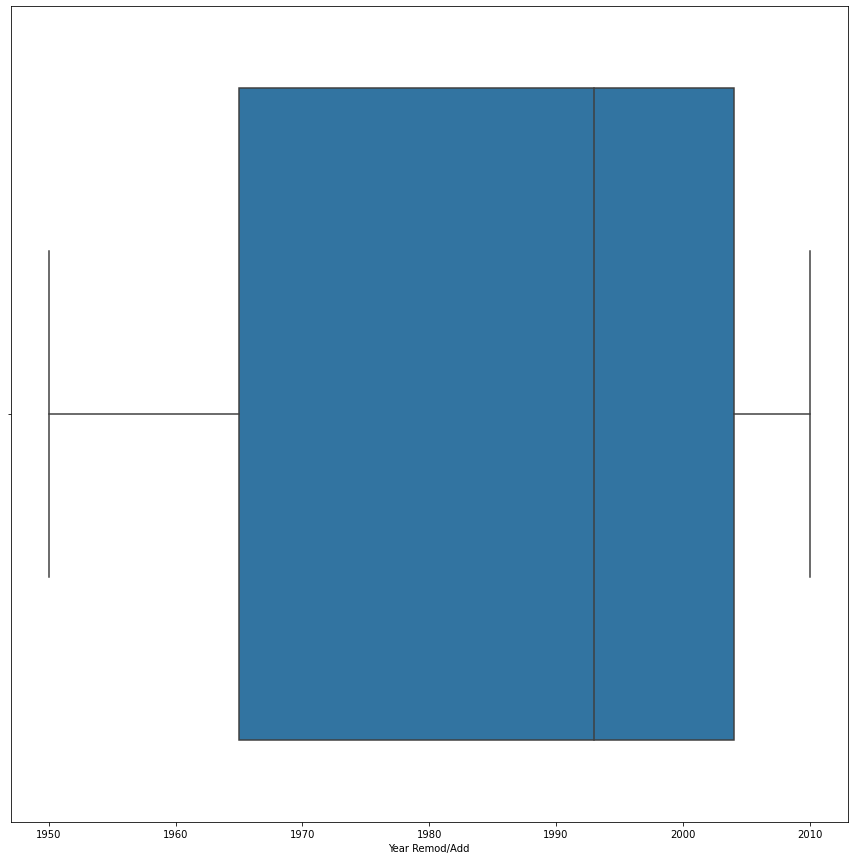

In [201]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Year Remod/Add',whis=1.5)

In [202]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Size of garage in square feet

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

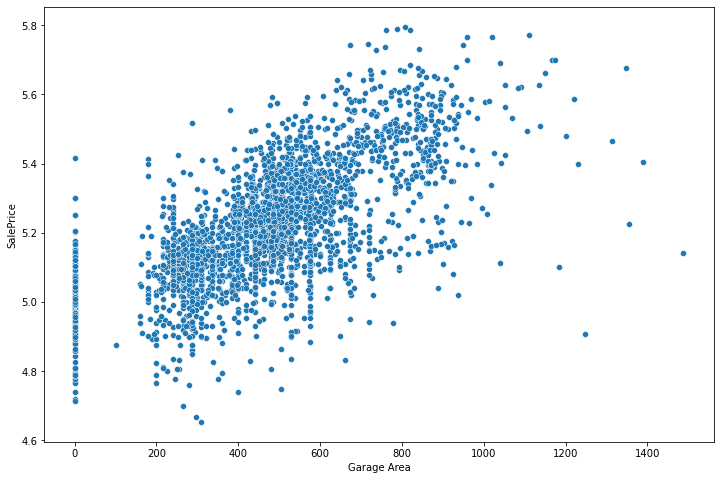

In [203]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Area',y='SalePrice',data=df)

In [204]:
df[(df['Garage Area']==0) & (df['SalePrice']>200000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice


In [205]:
df[(df['Garage Area']>1100) & (df['SalePrice']<200000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
366,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,1166.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.700563
426,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,1390.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.403623
746,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,1184.0,Fa,TA,P,NaN,NaN,NaN,WD,Normal,5.102091
818,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1138.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.509555
862,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,1231.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.397940
1027,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,...,1314.0,TA,Gd,Y,NaN,MnPrv,NaN,WD,Normal,5.466126
1052,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,...,1220.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.585461
1059,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,...,1150.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.662758
1258,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,1488.0,Fa,TA,N,NaN,GdWo,NaN,WD,Normal,5.143015
1425,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1348.0,Gd,TA,Y,NaN,NaN,NaN,WD,Abnorml,5.676694


In [206]:
df.drop([746,1258,1557,2282,1407],axis=0,inplace=True)

In [207]:
df[(df['Garage Area']>1300)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
426,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,1390.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.403623
1027,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,...,1314.0,TA,Gd,Y,NaN,MnPrv,NaN,WD,Normal,5.466126
1425,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1348.0,Gd,TA,Y,NaN,NaN,NaN,WD,Abnorml,5.676694


In [208]:
df.drop([426,1027,1425],axis=0,inplace=True)

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

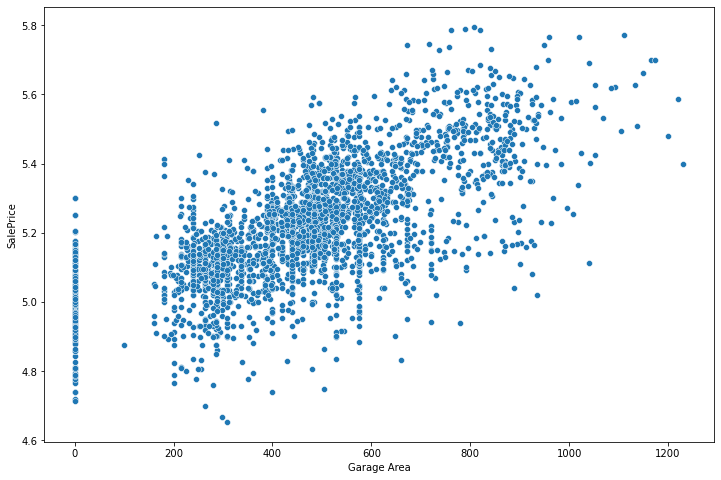

In [209]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Garage Area'>

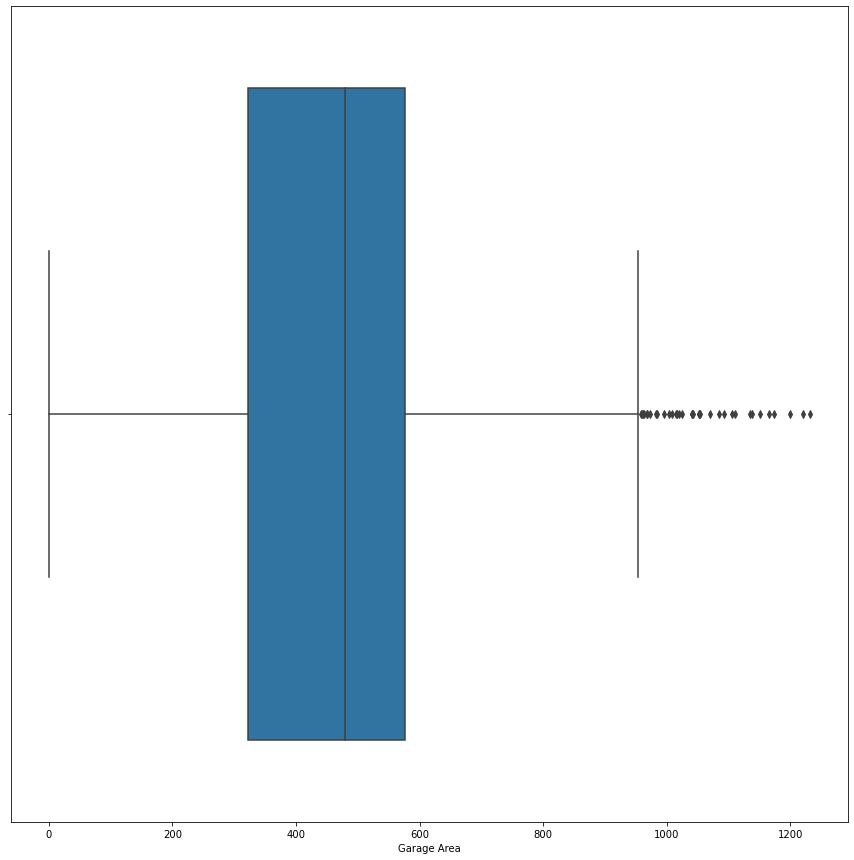

In [210]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Garage Area',whis=1.5)

In [211]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Size of garage in car capacity

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

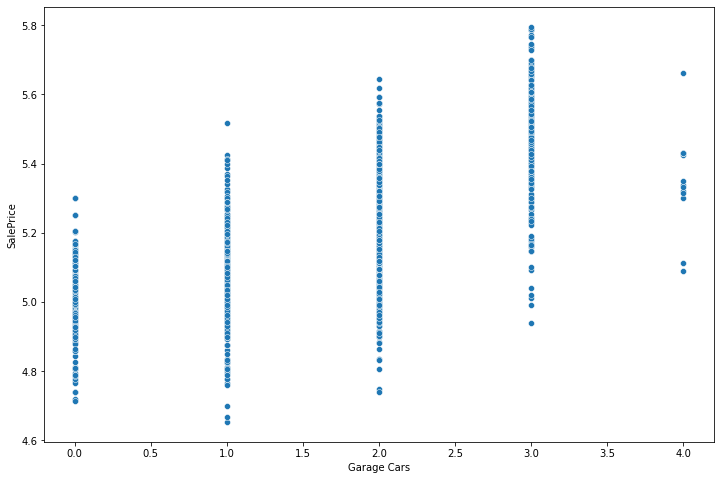

In [212]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df)

<AxesSubplot:xlabel='Garage Cars'>

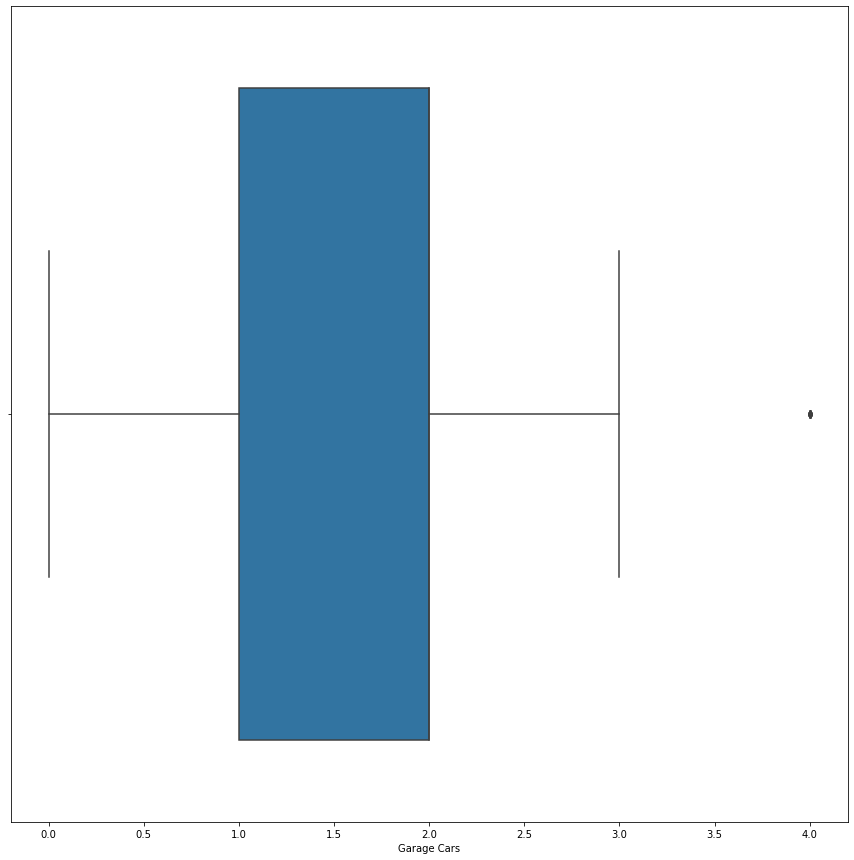

In [213]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Garage Cars',whis=1.5)

In [214]:
df[(df['Garage Cars']>3.5)].index

Int64Index([246, 669, 716, 815, 816, 817, 1059, 1588, 1589, 1668, 2278, 2749,
            2904],
           dtype='int64')

In [215]:
df.drop([246, 669, 716, 815, 816, 817, 1059, 1588, 1589, 1668, 2278,2749, 2904],axis=0,inplace=True)

<AxesSubplot:xlabel='Garage Cars'>

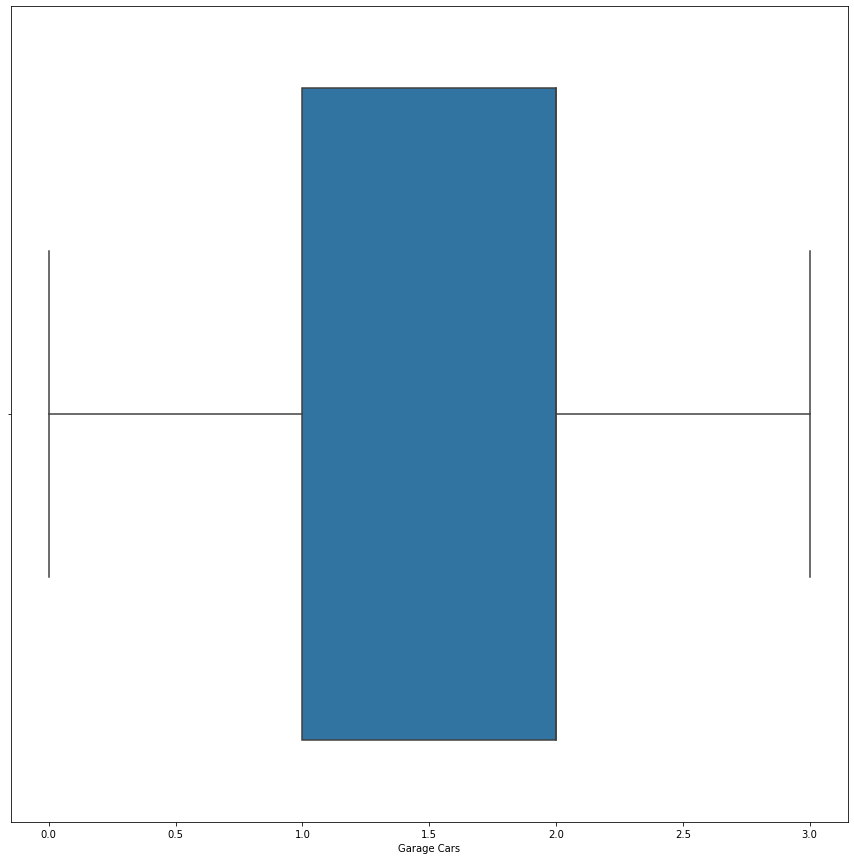

In [216]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Garage Cars',whis=1.5)

In [217]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Fireplaces

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

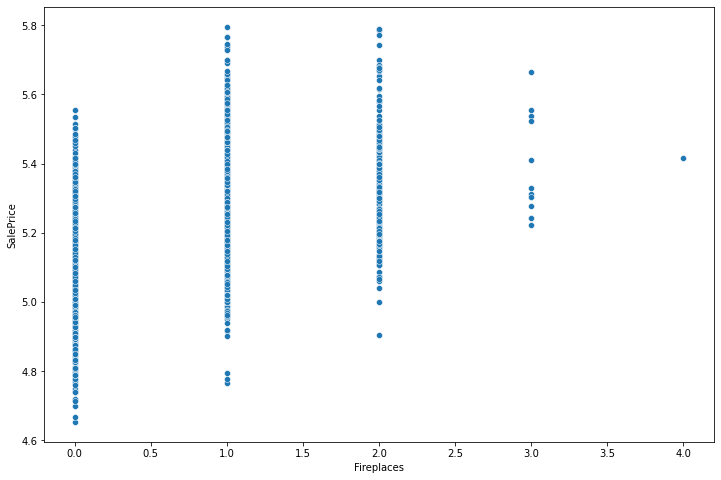

In [218]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Fireplaces',y='SalePrice',data=df)

<AxesSubplot:xlabel='Fireplaces'>

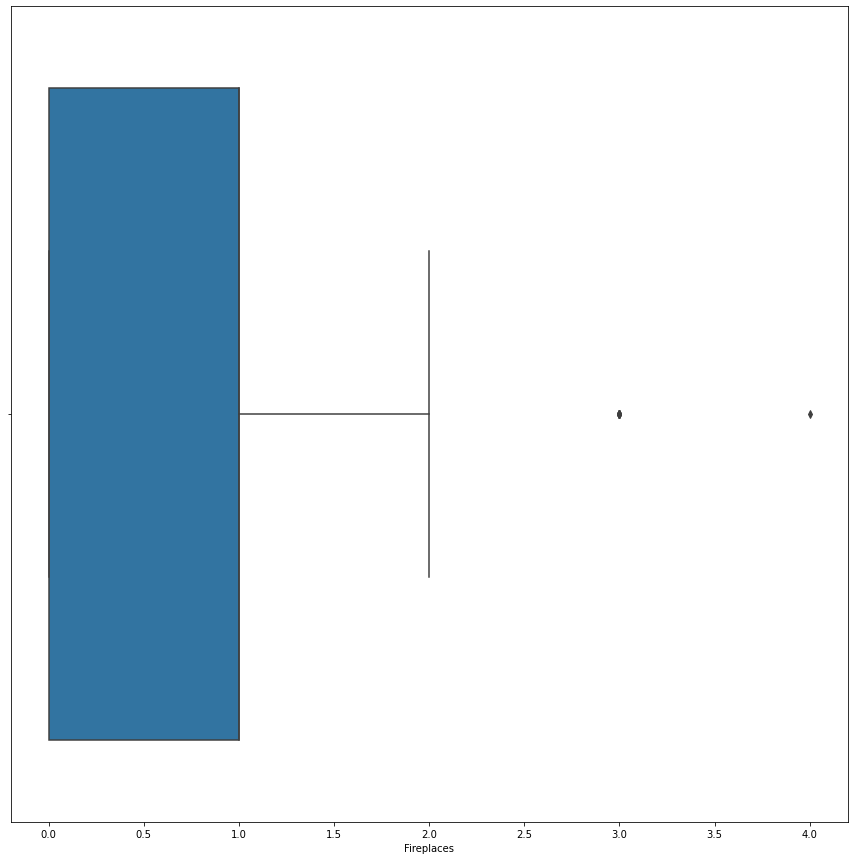

In [219]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Fireplaces',whis=1.5)

In [220]:
df[(df['Fireplaces']>2.5)].index

Int64Index([343, 421, 626, 785, 1924, 2223, 2395, 2498, 2500, 2518, 2590,
            2869],
           dtype='int64')

In [221]:
df.drop([343, 421, 626, 785, 1924, 2223, 2395, 2498, 2500, 2518, 2590,2869],axis=0,inplace=True)

<AxesSubplot:xlabel='Fireplaces'>

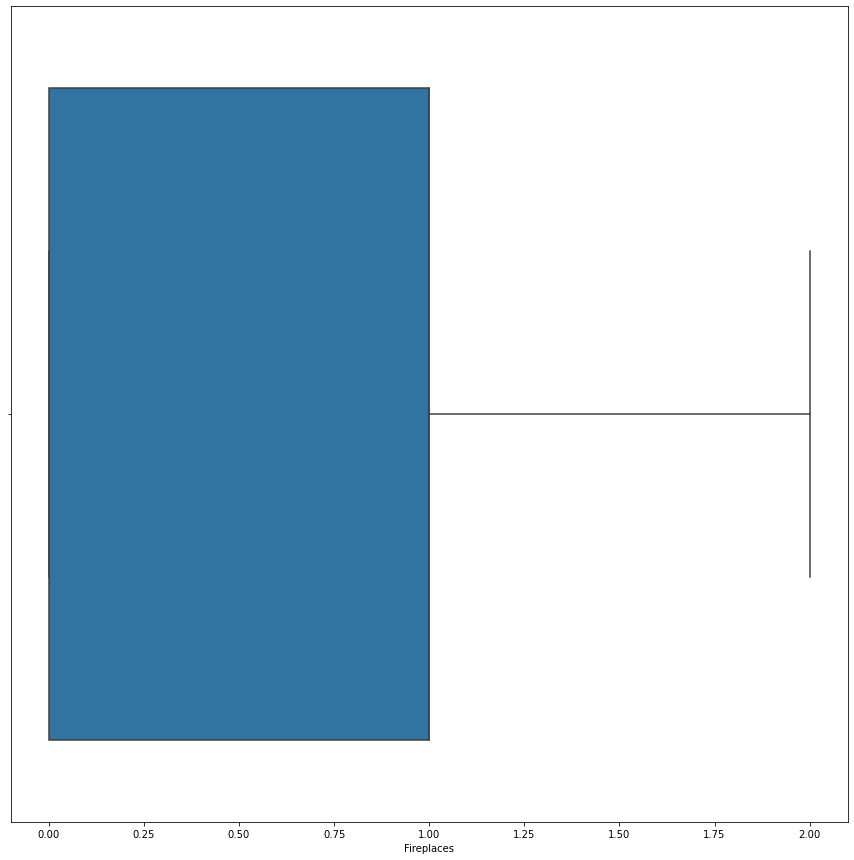

In [222]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Fireplaces',whis=1.5)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

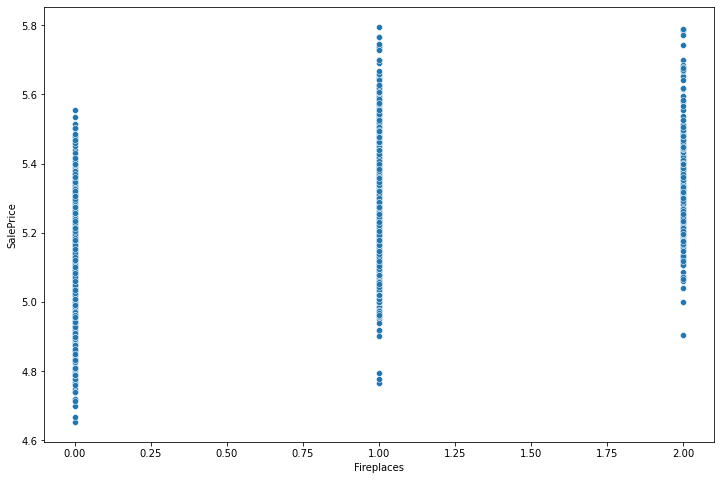

In [223]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Fireplaces',y='SalePrice',data=df)

In [224]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Total rooms above grade (does not include bathrooms)

<AxesSubplot:xlabel='TotRms AbvGrd', ylabel='SalePrice'>

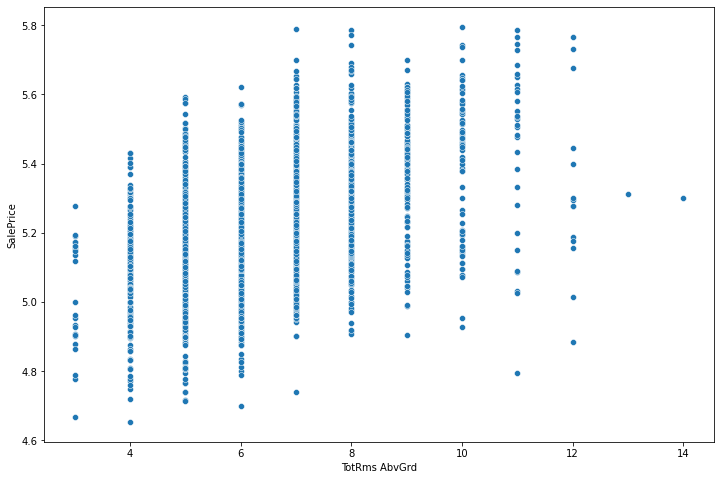

In [225]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='TotRms AbvGrd',y='SalePrice',data=df)

<AxesSubplot:xlabel='TotRms AbvGrd'>

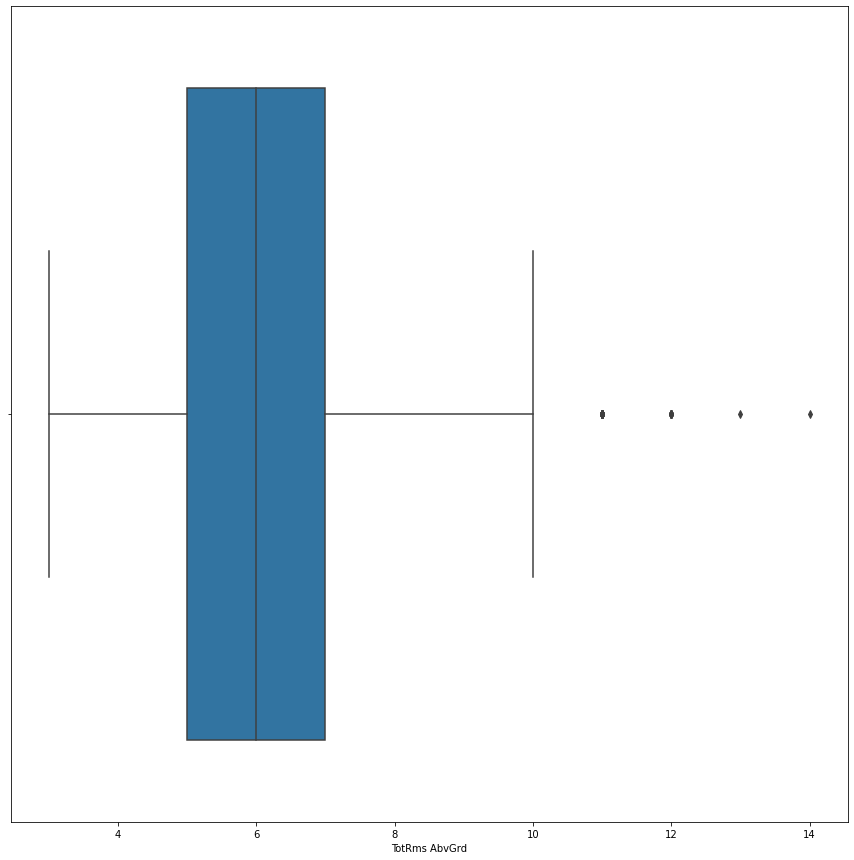

In [226]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='TotRms AbvGrd',whis=1.5)

In [227]:
df[(df['TotRms AbvGrd']>12)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
925,RL,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,Crawfor,Norm,...,400.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.311754
2194,RH,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,...,0.0,NaN,NaN,N,NaN,NaN,NaN,WD,Abnorml,5.301030


In [228]:
df.drop([925,2194],axis=0,inplace=True)

<AxesSubplot:xlabel='TotRms AbvGrd'>

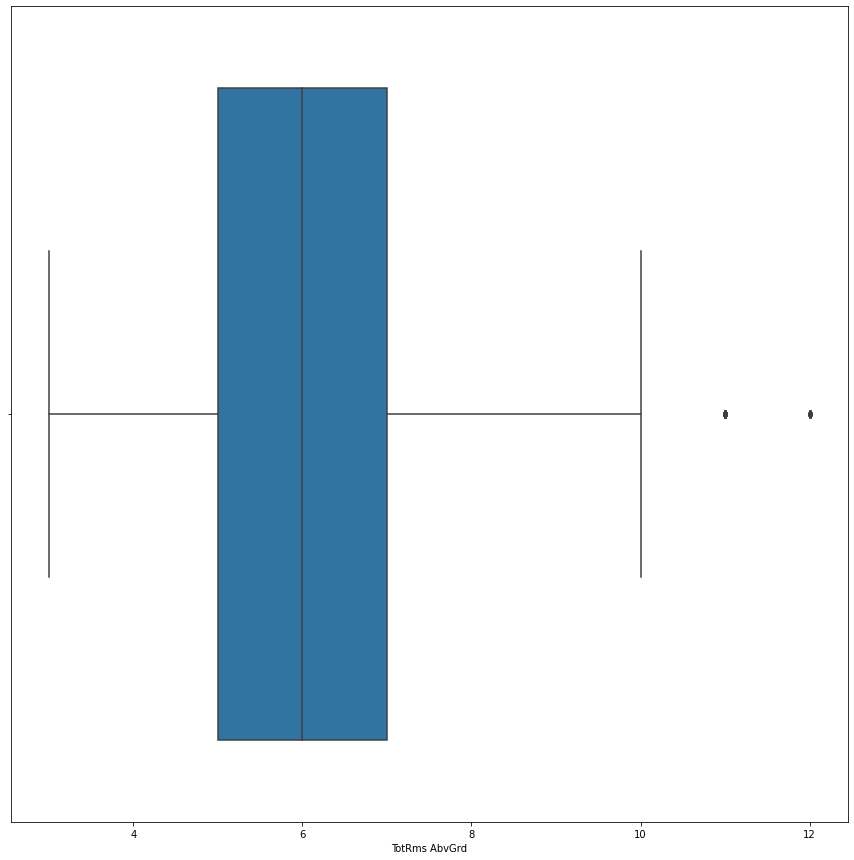

In [229]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='TotRms AbvGrd',whis=1.5)

In [230]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Rates the overall material and finish of the house

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

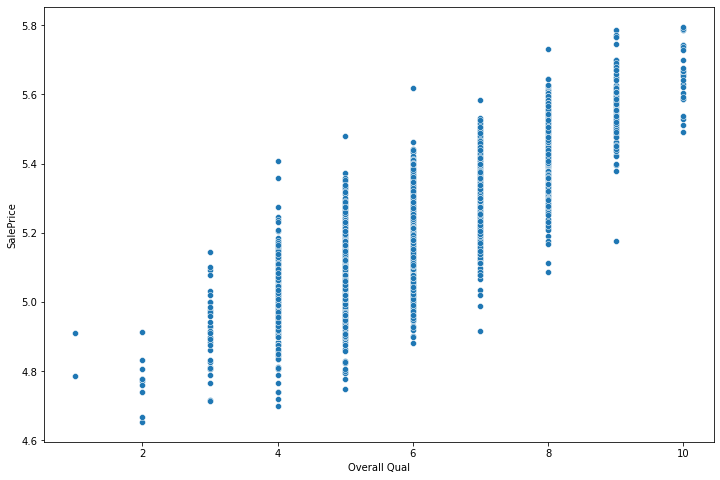

In [231]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<AxesSubplot:xlabel='Overall Qual'>

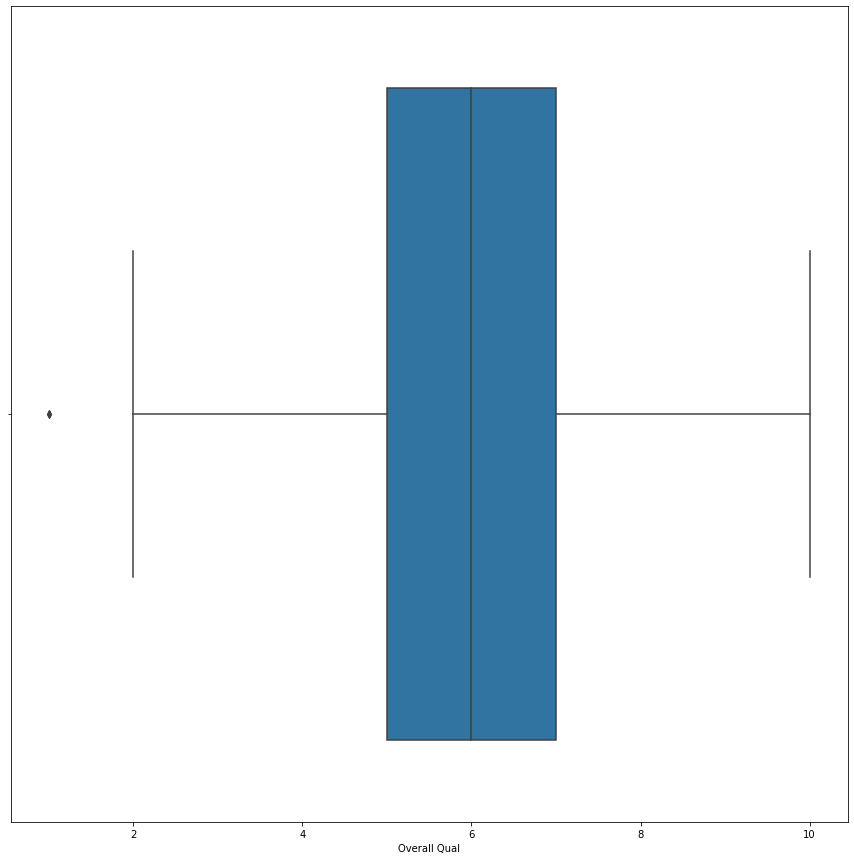

In [232]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Overall Qual',whis=1.5)

In [233]:
df[(df['Overall Qual']<2)].index

Int64Index([765, 2903], dtype='int64')

In [235]:
df.drop([765, 2903],axis=0,inplace=True)

<AxesSubplot:xlabel='Overall Qual'>

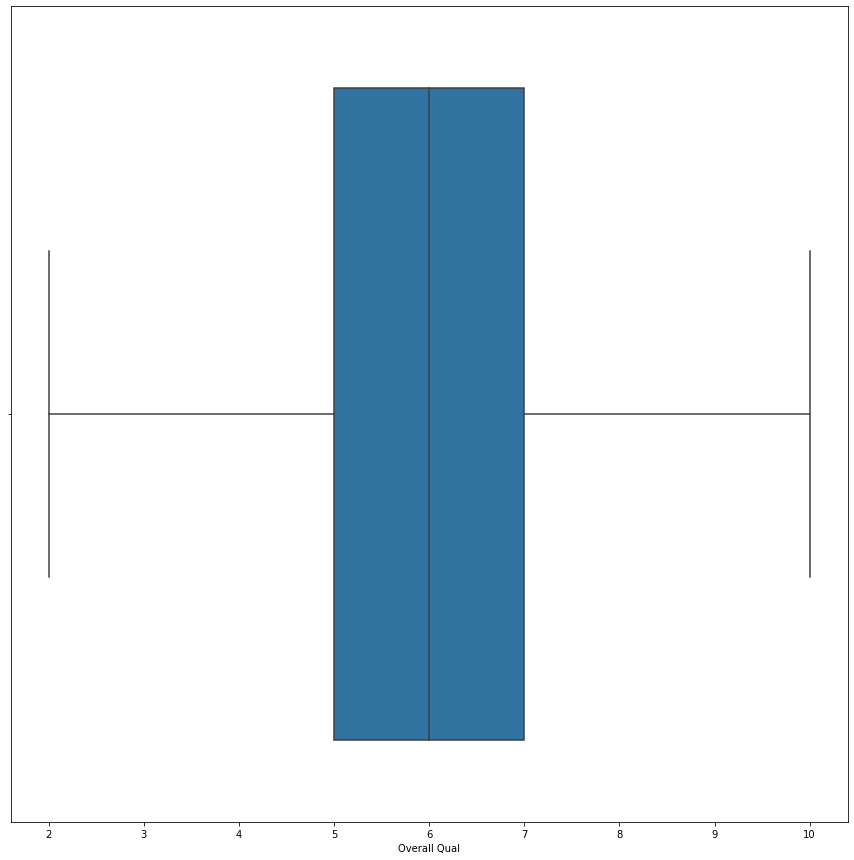

In [236]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Overall Qual',whis=1.5)

In [237]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Original construction date

In [240]:
df[(df['Year Built']>2000) & (df['SalePrice']<100000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,582.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.329398
15,RL,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,...,841.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.730782
17,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,...,834.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.595972
36,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,751.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.575375
37,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,772.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.485721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,765.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.494850
2900,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,...,714.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.505150
2901,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,880.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.568084
2902,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,682.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,5.556182


In [241]:
df.drop([185,1306,1320,2666,2907],axis=0,inplace=True)

<AxesSubplot:xlabel='Year Built'>

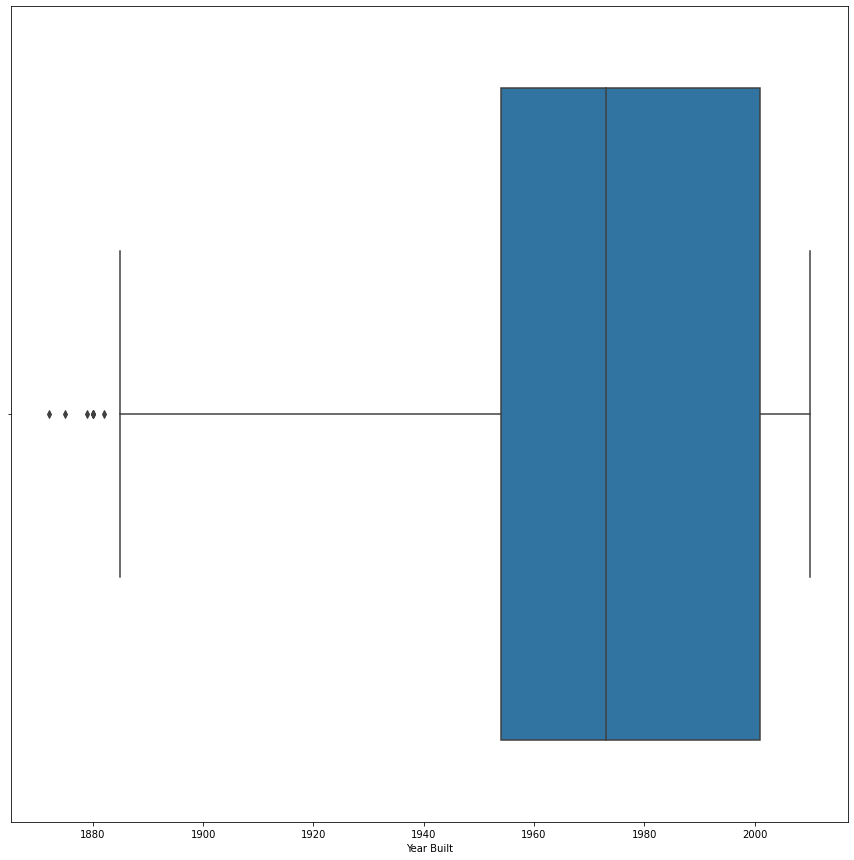

In [242]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Year Built',whis=1.5)

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

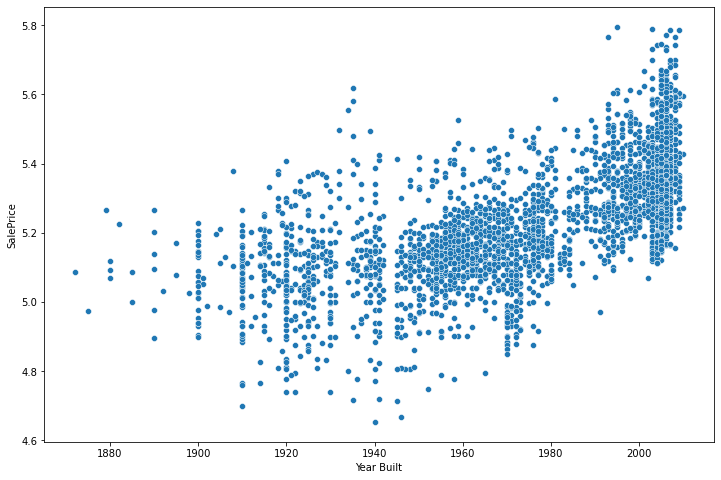

In [243]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Built',y='SalePrice',data=df)

In [244]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


Feature : Full bathrooms above grade

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

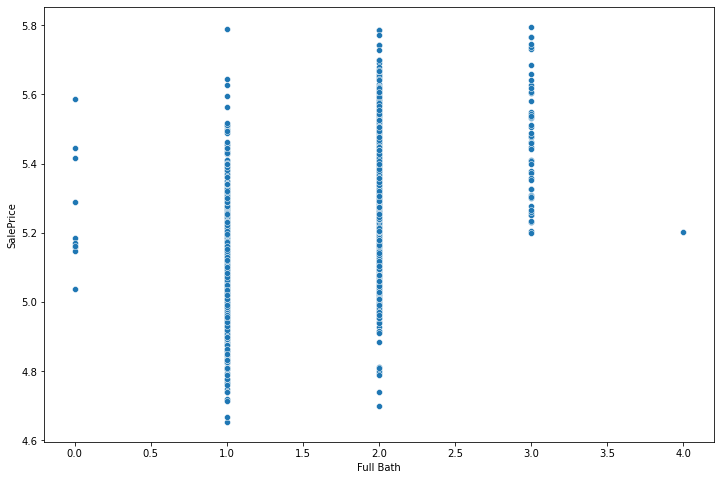

In [245]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Full Bath',y='SalePrice',data=df)

<AxesSubplot:xlabel='Full Bath'>

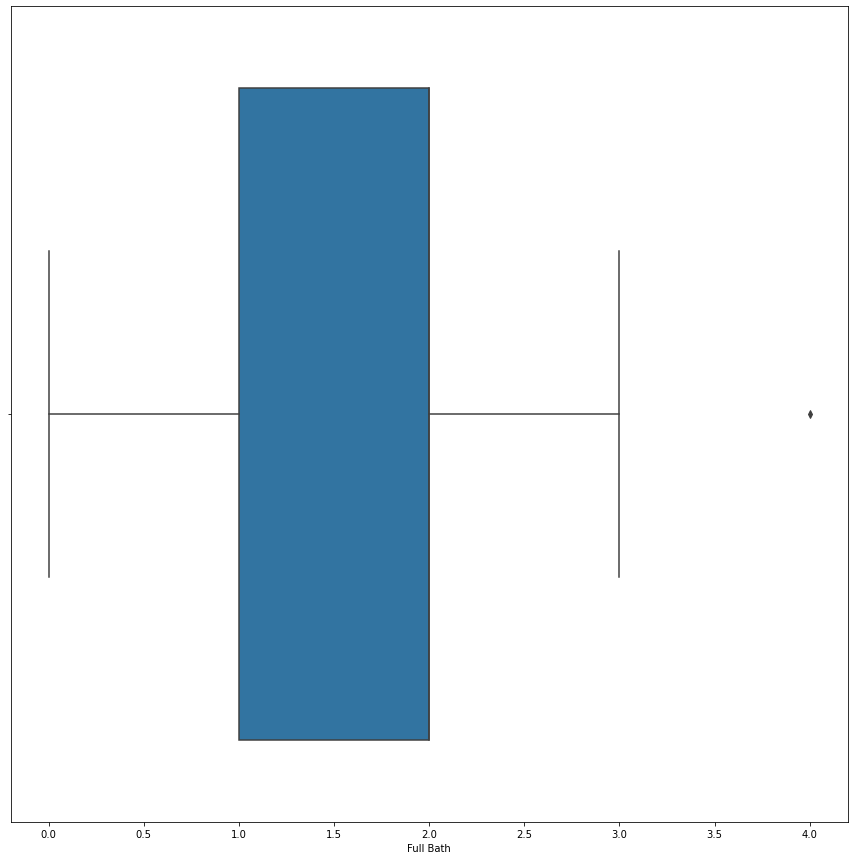

In [246]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Full Bath',whis=1.5)

In [247]:
df[(df['Full Bath']==4)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
336,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,616.0,TA,Fa,Y,NaN,NaN,Shed,WD,Normal,5.201397


In [250]:
df.drop([1063,336],axis=0,inplace=True)

KeyError: '[1063  336] not found in axis'

<AxesSubplot:xlabel='Full Bath'>

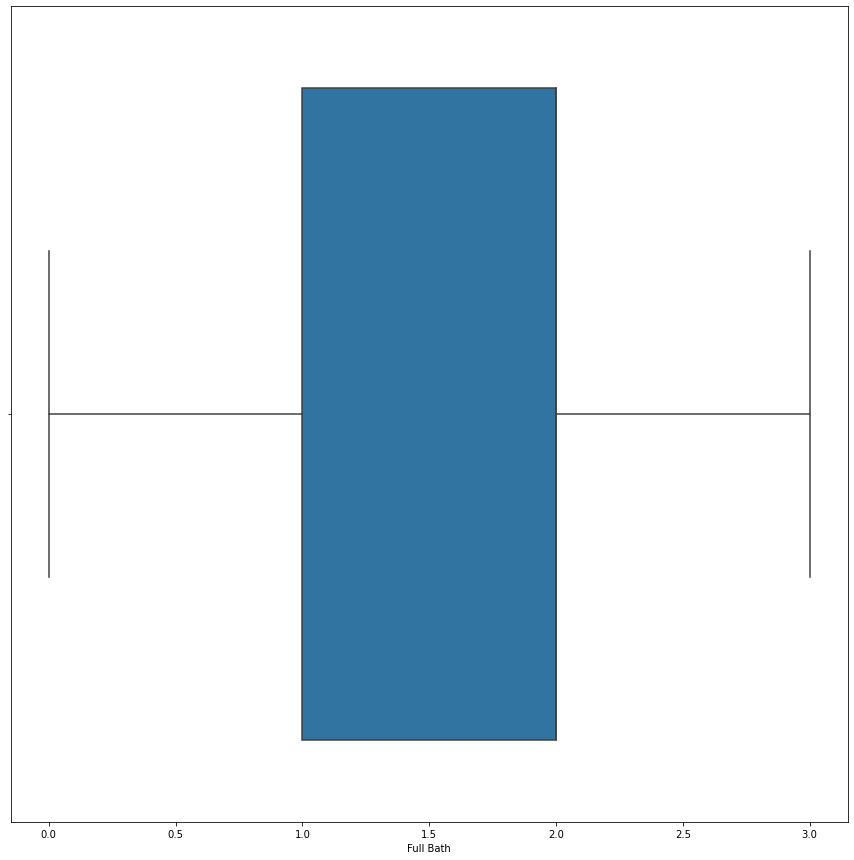

In [251]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Full Bath',whis=1.5)

In [252]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


**Removing Sale Price more than 550000**

In [253]:
df[df['SalePrice']>480000].index

Int64Index([], dtype='int64')

In [254]:
df.drop([15,44,46,366,422,423,432,433,456, 1637, 1691,1701, 2330, 2332, 2334, 2450],axis=0,inplace=True)

<AxesSubplot:xlabel='SalePrice'>

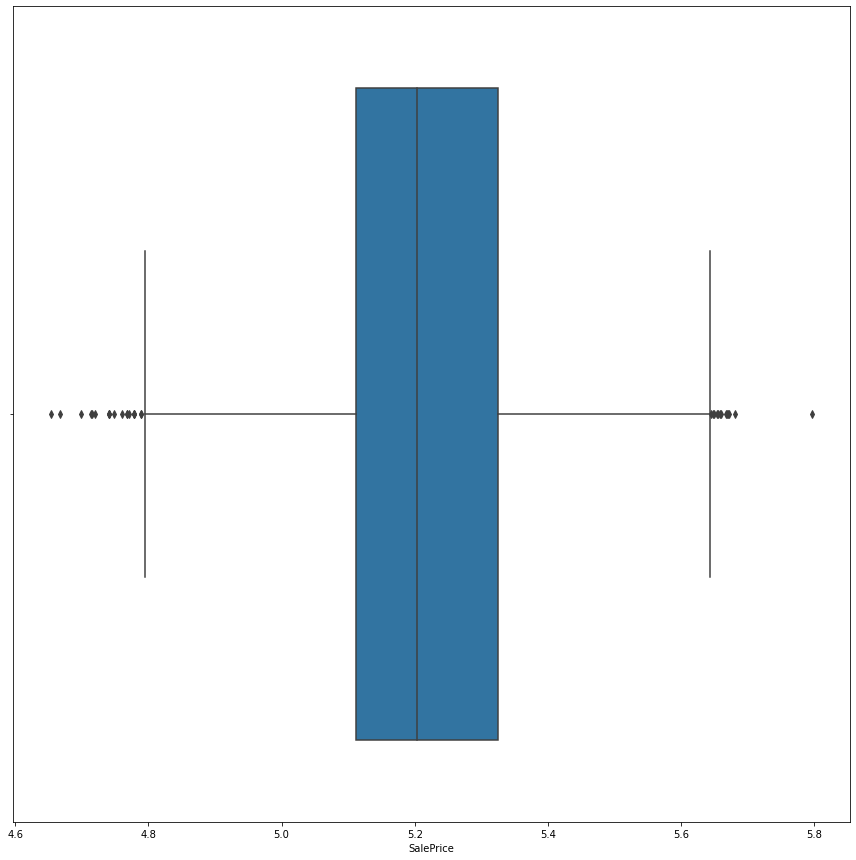

In [255]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='SalePrice',whis=1.5)

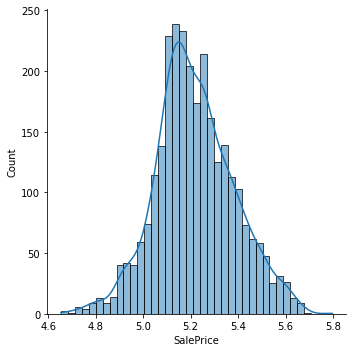

In [256]:
sns.displot(data=df,x='SalePrice',kde=True)

In [257]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,5.332438
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.021189
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,5.235528
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.387390
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,5.153815
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,5.117271
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5.120574
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5.230449


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2846 entries, 0 to 2929
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS Zoning       2846 non-null   object 
 1   Street          2846 non-null   object 
 2   Alley           192 non-null    object 
 3   Lot Shape       2846 non-null   object 
 4   Land Contour    2846 non-null   object 
 5   Utilities       2846 non-null   object 
 6   Lot Config      2846 non-null   object 
 7   Land Slope      2846 non-null   object 
 8   Neighborhood    2846 non-null   object 
 9   Condition 1     2846 non-null   object 
 10  Condition 2     2846 non-null   object 
 11  Bldg Type       2846 non-null   object 
 12  House Style     2846 non-null   object 
 13  Overall Qual    2846 non-null   int64  
 14  Year Built      2846 non-null   int64  
 15  Year Remod/Add  2846 non-null   int64  
 16  Roof Style      2846 non-null   object 
 17  Roof Matl       2846 non-null   o

In [259]:
df.to_csv(r'C:\Users\Acer\Ames Housing Data No Outlier Edited.csv',index=False)